In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sleep_health_data = pd.read_csv('sleep_health_data.csv', index_col=0)

sleep_health_data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [8]:
occupation_sleep_data = sleep_health_data[['Occupation', 'Sleep Duration', 'Quality of Sleep', 'Stress Level']].copy()
occupation_sleep_data['Stress Category'] = occupation_sleep_data['Stress Level'].apply(lambda x: 'low' if x <= 3 else ('medium' if x <= 6 else 'High'))
average_occupation = occupation_sleep_data.groupby(['Occupation', 'Stress Category'])[['Sleep Duration', 'Quality of Sleep']].agg('mean')

# Top 5 Occupations with the lowest average sleep duration
lowest_sleep_occ = average_occupation.sort_values('Sleep Duration', ascending=True)

for (occupation, stress_category), row in lowest_sleep_occ.head(5).iterrows():
    print(f'Occupation: {occupation}')
    print(f'Stress Category: {stress_category}')
    print(f'Average Sleep Duration: {round(row["Sleep Duration"], 2)}, \n')

Occupation: Scientist
Stress Category: High
Average Sleep Duration: 5.8, 

Occupation: Sales Representative
Stress Category: High
Average Sleep Duration: 5.9, 

Occupation: Software Engineer
Stress Category: High
Average Sleep Duration: 5.9, 

Occupation: Doctor
Stress Category: High
Average Sleep Duration: 6.06, 

Occupation: Nurse
Stress Category: High
Average Sleep Duration: 6.11, 



In [9]:
# Top 5 Occupations with the lowest average sleep quality
lowest_sleep_quality_occ = average_occupation.sort_values('Quality of Sleep', ascending=True)

for (occupation, stress_category), row in lowest_sleep_quality_occ.head(5).iterrows():
    print(f'Occupation: {occupation}')
    print(f'Stress Category: {stress_category}')
    print(f'Average Quality of Sleep: {round(row["Quality of Sleep"], 2)}, \n')

Occupation: Sales Representative
Stress Category: High
Average Quality of Sleep: 4.0, 

Occupation: Scientist
Stress Category: High
Average Quality of Sleep: 4.0, 

Occupation: Software Engineer
Stress Category: High
Average Quality of Sleep: 4.0, 

Occupation: Teacher
Stress Category: High
Average Quality of Sleep: 5.6, 

Occupation: Nurse
Stress Category: High
Average Quality of Sleep: 5.89, 



In [12]:
bmi_sleep_data = sleep_health_data[['BMI Category', 'Sleep Disorder']].copy()
bmi_sleep_data['with Sleep Disorder'] = bmi_sleep_data['Sleep Disorder'].isin(['Insomnia', 'Sleep Apnea'])

# How many in each BMI Category has Sleep Disorder
bmi_with_sleep_disorder = bmi_sleep_data.groupby('BMI Category')['with Sleep Disorder'].value_counts()
bmi_with_sleep_disorder.sort_values(ascending=False)

BMI Category  with Sleep Disorder
Normal        False                  200
Overweight    True                   129
              False                   19
Normal        True                    16
Obese         True                    10
Name: count, dtype: int64

In [13]:
# How many in each BMI Category has Sleep Disorder based on the Type
bmi_sleep_disorder_type = bmi_sleep_data.groupby('BMI Category')['Sleep Disorder'].value_counts()
bmi_sleep_disorder_type.sort_values(ascending=False)

BMI Category  Sleep Disorder
Overweight    Sleep Apnea       65
              Insomnia          64
Normal        Insomnia           9
              Sleep Apnea        7
Obese         Sleep Apnea        6
              Insomnia           4
Name: count, dtype: int64

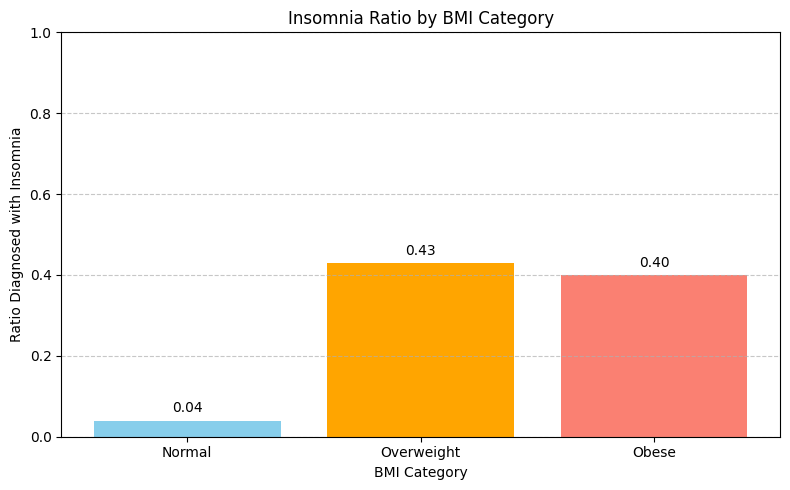

In [30]:
bmi_insomnia = bmi_sleep_data.groupby('BMI Category')['Sleep Disorder'].value_counts()

normal_insomnia = bmi_insomnia[('Normal', 'Insomnia')]
overweight_insomnia = bmi_insomnia[('Overweight', 'Insomnia')]
obese_insomnia = bmi_insomnia[('Obese', 'Insomnia')]

bmi_category = bmi_sleep_data['BMI Category'].agg('value_counts')

normal_total = bmi_category['Normal']
overweight_total = bmi_category['Overweight']
obese_total = bmi_category['Obese']

normal_ratio = round(normal_insomnia / normal_total, 2)
overweight_ratio = round(overweight_insomnia / overweight_total, 2)
obese_ratio = round(obese_insomnia / obese_total, 2)

# Ratio of how many in each BMI Category have been diagnosed with Insomnia
bmi_categories = ['Normal', 'Overweight', 'Obese']
bmi_ratios = [normal_ratio, overweight_ratio, obese_ratio]

plt.figure(figsize=(8, 5))
plt.bar(bmi_categories, bmi_ratios, color=['skyblue', 'orange', 'salmon'])
plt.title('Insomnia Ratio by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Ratio Diagnosed with Insomnia')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, ratio in enumerate(bmi_ratios):
    plt.text(i, ratio + 0.02, f'{ratio:.2f}', horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()